In [119]:
import numpy as np
import pandas as pd

#Importing Data
- this is a small datset and it is availble on kaggle

In [120]:
df=pd.read_csv('/content/train.csv')

-the columns are a bit hard to understand just by looking at there names so you cann either go to kaggles and look into the dataset description or you can use google or perplexity to search for them its alwasys a good idea to have some domain knowledge

In [121]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


#Dependencies

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

In [123]:
#lets have a look into our data
df.shape

(800, 22)

In [124]:
df.sample(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
202,203,1,1,1,1,1,1,1,0,1,1,22.610072,m,Others,no,yes,United Kingdom,no,3.025563,18 and more,Self,0
596,597,1,0,1,0,1,0,0,1,1,1,75.435646,f,?,no,no,United States,no,-1.110048,18 and more,Self,0
589,590,0,0,0,0,1,0,0,0,0,0,14.732244,m,?,no,no,India,no,1.963125,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0
260,261,1,1,1,1,1,1,1,1,1,1,42.013166,m,Pasifika,no,no,United Kingdom,no,11.688423,18 and more,Self,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [126]:
pd.set_option('display.max_columns', None)

In [127]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


- the age values are float we need them in int
- the agedesc column is useless here
- the id column is not contributing factor
- ethnicity i think is also not important
- and the yes no should be encoded also the other categories

In [128]:
df['age']=df['age'].astype(int)

In [129]:
df=df.drop(columns=['age_desc','ethnicity','ID'])

In [130]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

- there are also some issues with the typing also with the column name

In [131]:
df['Country_of_res']=df['contry_of_res']
df=df.drop(columns=['contry_of_res'])

In [132]:
mappinng={
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

df['Country_of_res'] = df['Country_of_res'].replace(mappinng)

In [133]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,used_app_before,result,relation,Class/ASD,Country_of_res
0,1,0,1,0,1,0,1,0,1,1,38,f,no,no,no,6.351166,Self,0,Austria
1,0,0,0,0,0,0,0,0,0,0,47,m,no,no,no,2.255185,Self,0,India
2,1,1,1,1,1,1,1,1,1,1,7,m,no,yes,no,14.851484,Self,1,United States
3,0,0,0,0,0,0,0,0,0,0,23,f,no,no,no,2.276617,Self,0,United States
4,0,0,0,0,0,0,0,0,0,0,43,m,no,no,no,-4.777286,Self,0,South Africa


In [134]:
df['Country_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [135]:
df['austim'].value_counts()

,count
austim,
no,669
yes,131


- hhuge class imbalance but its common for these type of data

In [136]:
df['austim']=df['austim'].map({'yes':1,'no':0})

In [137]:
df['gender']=df['gender'].map({'m':1,'f':2})

In [138]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,used_app_before,result,relation,Class/ASD,Country_of_res
0,1,0,1,0,1,0,1,0,1,1,38,2,no,0,no,6.351166,Self,0,Austria
1,0,0,0,0,0,0,0,0,0,0,47,1,no,0,no,2.255185,Self,0,India
2,1,1,1,1,1,1,1,1,1,1,7,1,no,1,no,14.851484,Self,1,United States
3,0,0,0,0,0,0,0,0,0,0,23,2,no,0,no,2.276617,Self,0,United States
4,0,0,0,0,0,0,0,0,0,0,43,1,no,0,no,-4.777286,Self,0,South Africa


#Exploratory_Data_Analysis

In [139]:
df.describe()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,austim,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,1.337500,0.16375,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,0.473153,0.37028,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.00000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,0.00000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,1.000000,0.00000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,2.000000,0.00000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,2.000000,1.00000,15.853126,1.000000


##Univariate_analysis
### Numericall_columns
- age
- result

27.96375
24.0


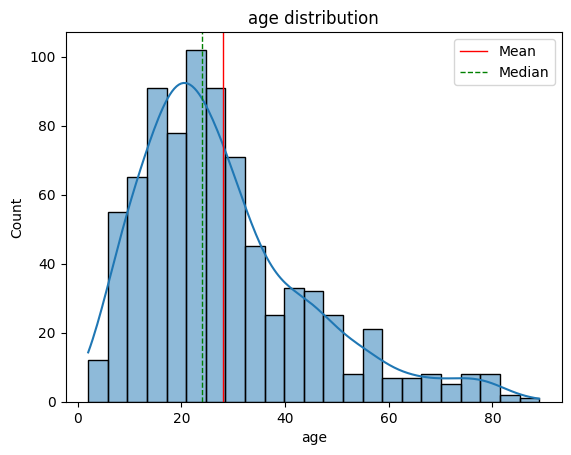

In [140]:
sns.histplot(df['age'],kde=True)
plt.title('age distribution')
# add lines for mean and median
plt.axvline(df['age'].mean(), color='r', linewidth=1,label='Mean')
plt.axvline(df['age'].median(), color='g', linestyle='dashed', linewidth=1,label='Median')
plt.legend()

print(df['age'].mean())
print(df['age'].median())
plt.show()

8.537303106501248
9.605299308


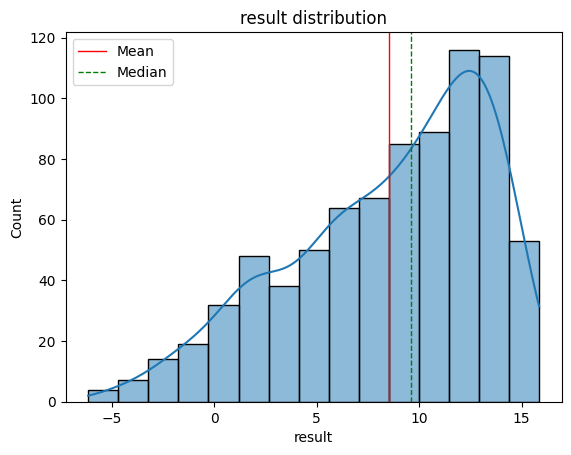

In [141]:
sns.histplot(df['result'],kde=True)
plt.title('result distribution')
# add lines for mean and median
plt.axvline(df['result'].mean(), color='r', linewidth=1,label='Mean')
plt.axvline(df['result'].median(), color='g', linestyle='dashed', linewidth=1,label='Median')
plt.legend()

print(df['result'].mean())
print(df['result'].median())
plt.show()

<Axes: >

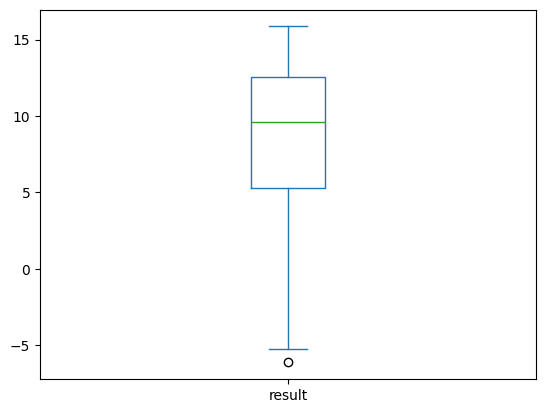

In [142]:
df['result'].plot(kind='box')

<Axes: >

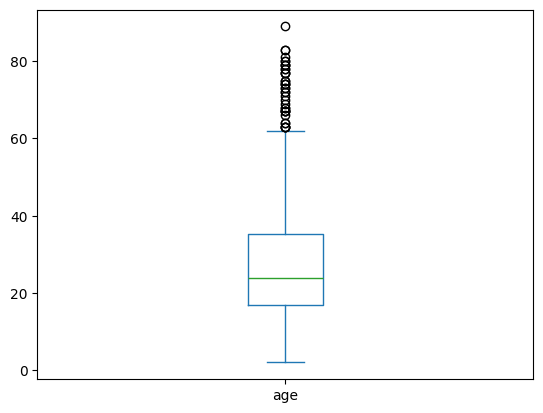

In [143]:
df['age'].plot(kind='box')

In [144]:
(df['age']>60).sum()

np.int64(44)

#Univariate
##Categorical_Values


In [145]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'austim', 'used_app_before', 'result', 'relation',
       'Class/ASD', 'Country_of_res'],
      dtype='object')

In [146]:
categorical_cols=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',  'gender',
       'jaundice', 'austim', 'used_app_before', 'relation',
       'Class/ASD', 'Country_of_res']

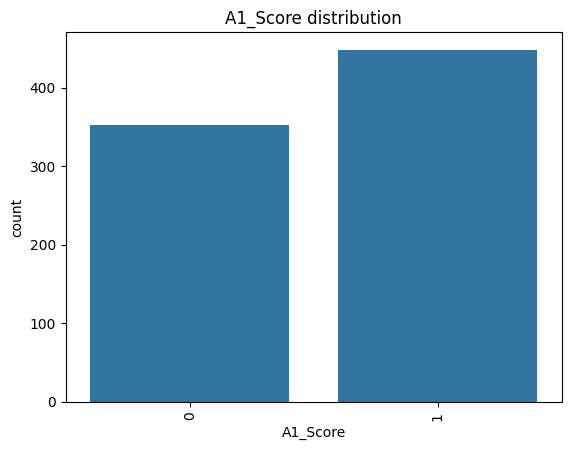

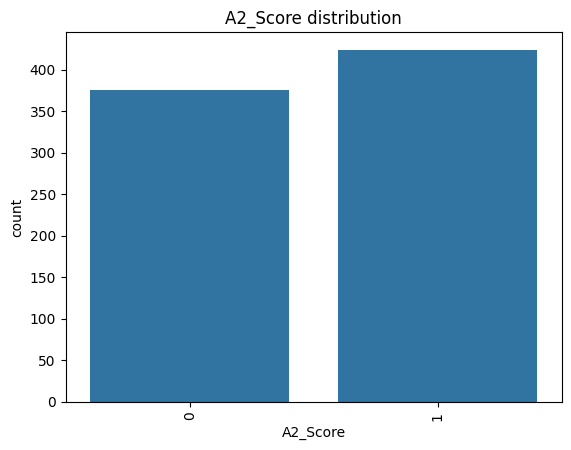

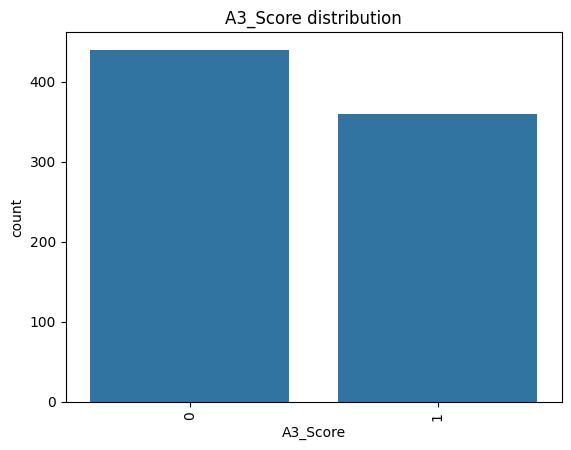

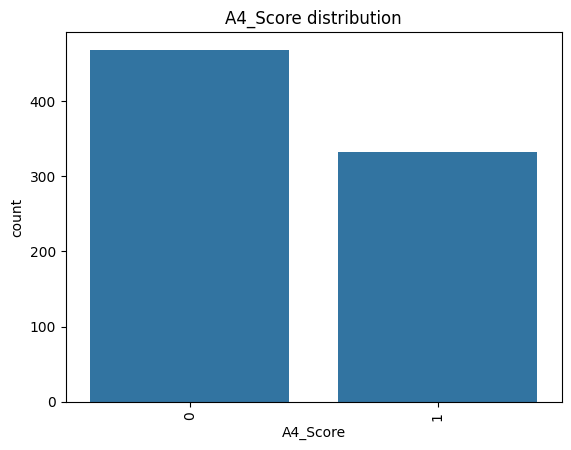

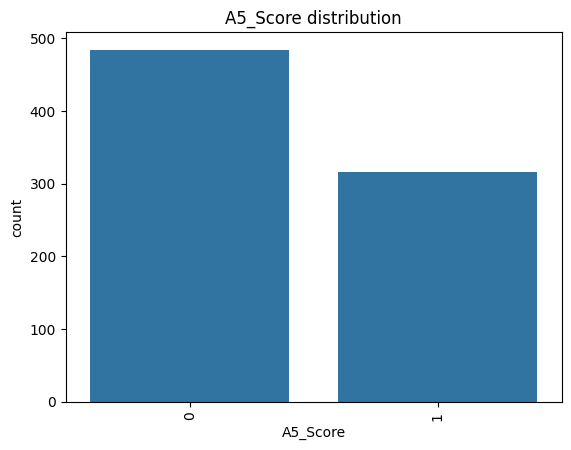

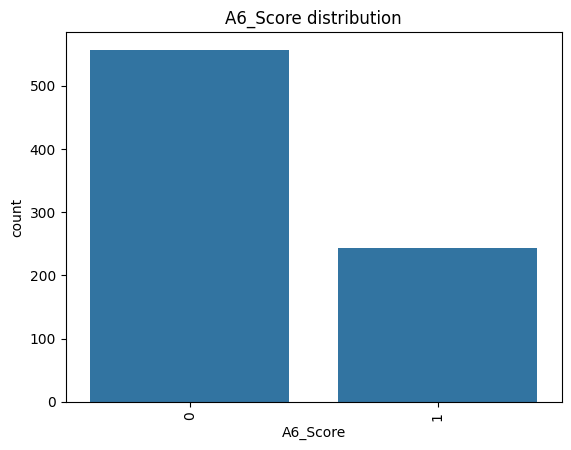

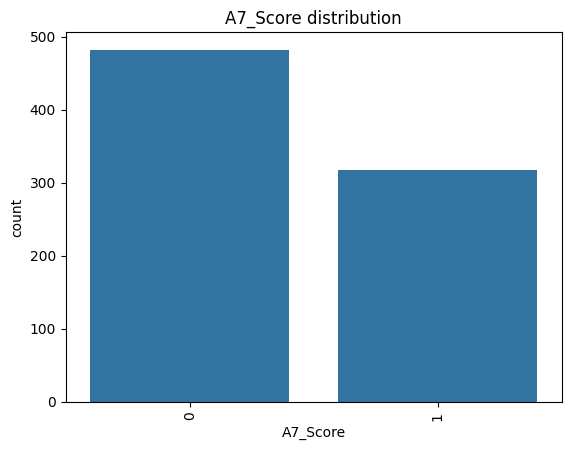

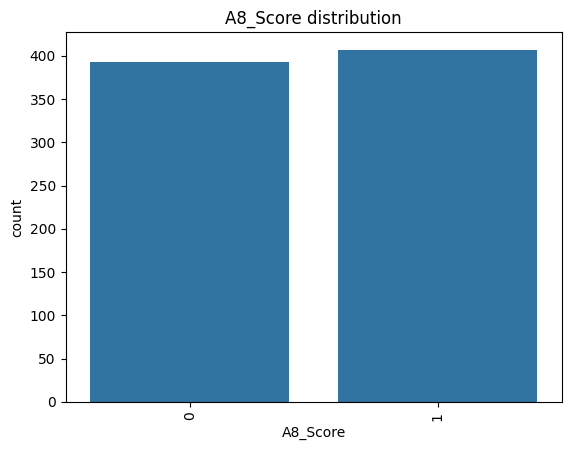

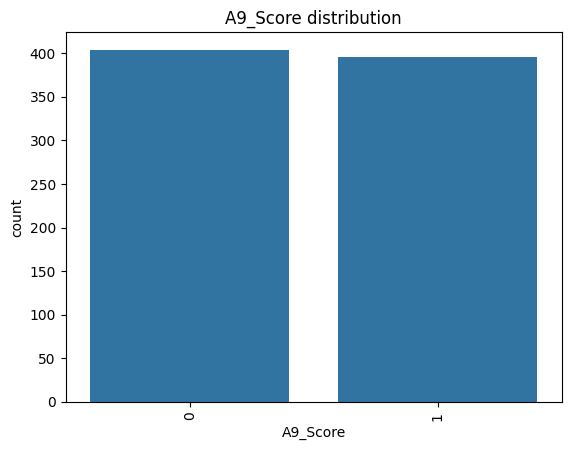

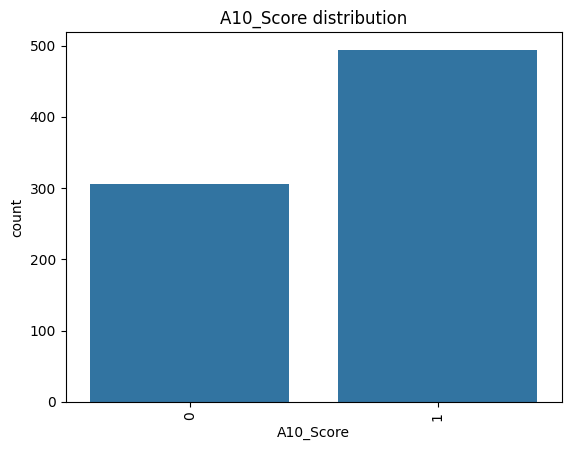

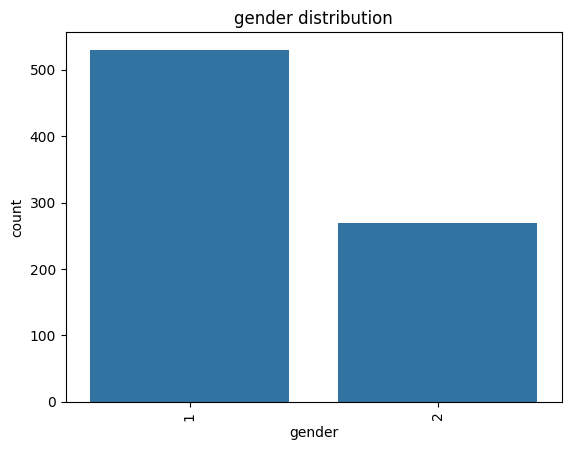

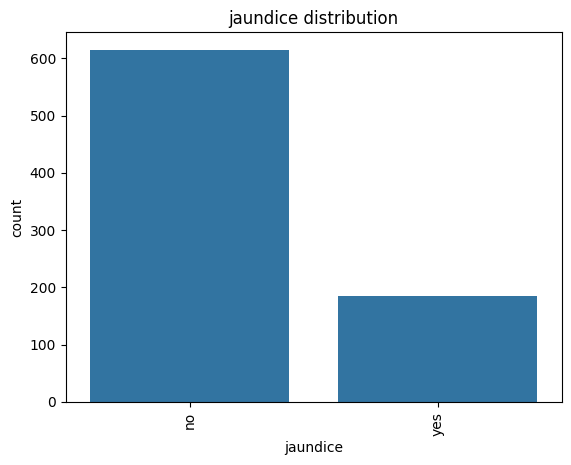

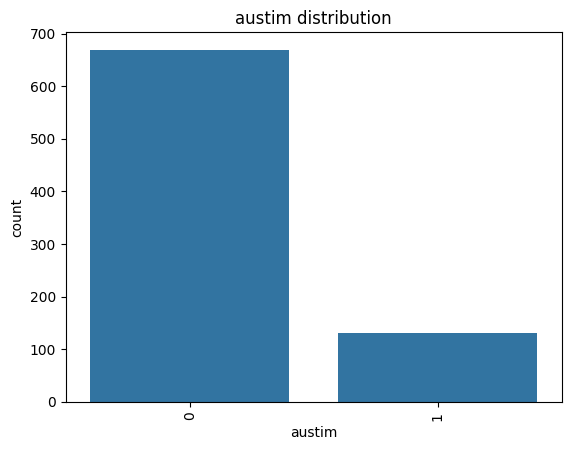

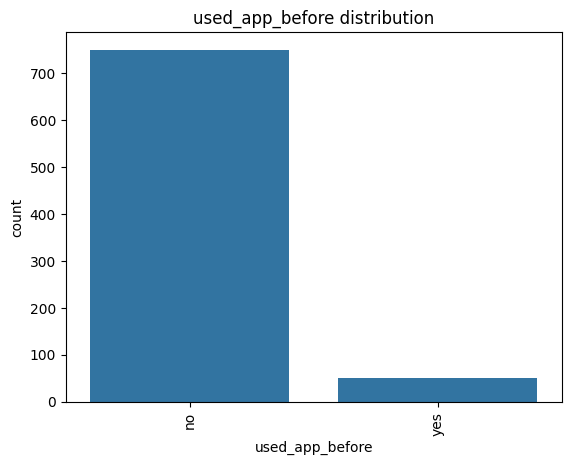

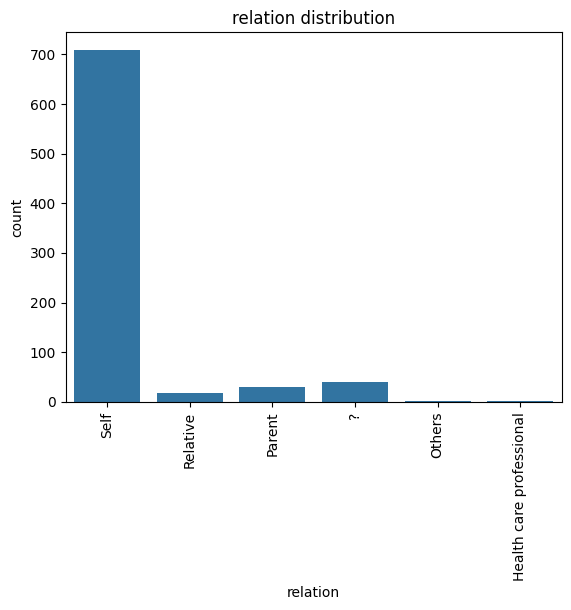

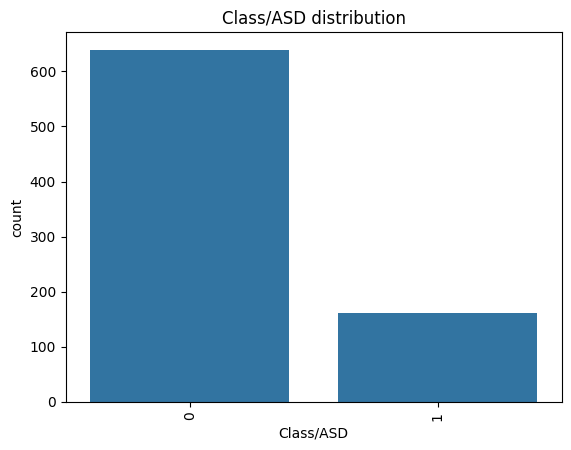

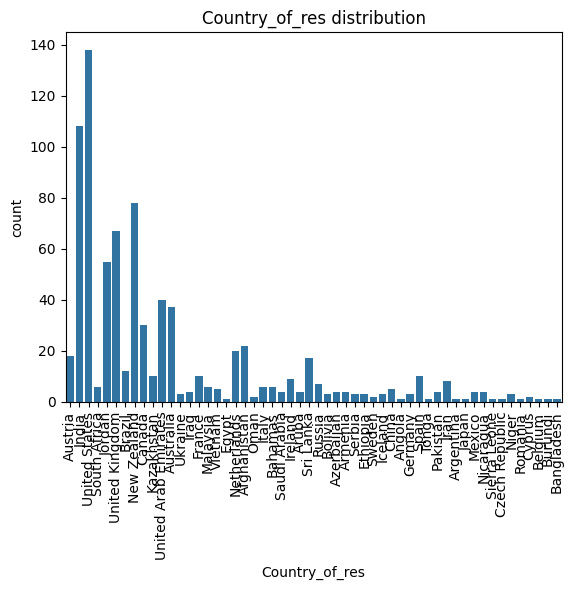

In [147]:
for col in categorical_cols:
  sns.countplot(x=df[col])
  plt.title(f'{col} distribution')
  plt.xticks(rotation=90)
  plt.show()

  plt.show()

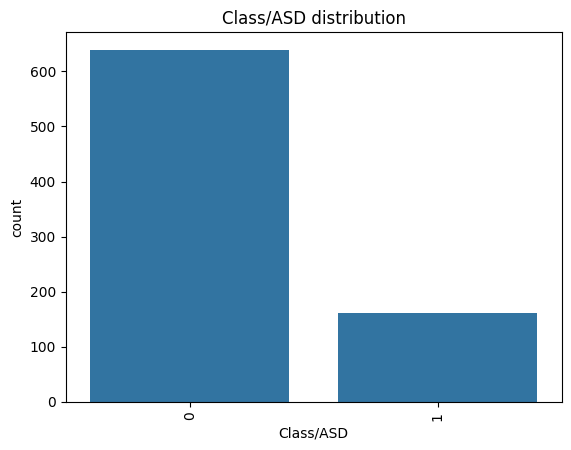

In [148]:
sns.countplot(x=df['Class/ASD'])
plt.title('Class/ASD distribution')
plt.xticks(rotation=90)
plt.show()

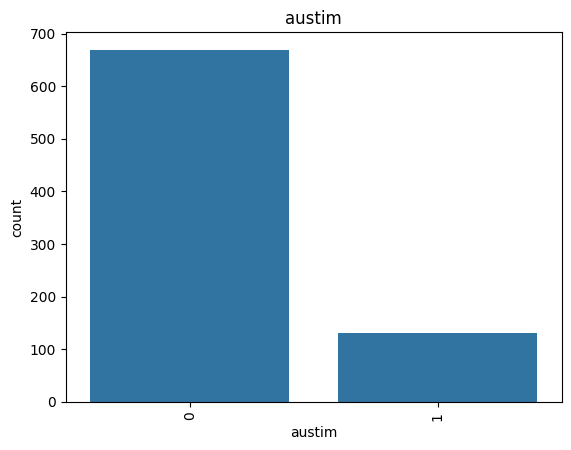

In [150]:
sns.countplot(x=df['austim'])
plt.title('austim')
plt.xticks(rotation=90)
plt.show()

In [151]:
print(df['austim'].value_counts())
print(df['Class/ASD'].value_counts())

austim
0    669
1    131
Name: count, dtype: int64
Class/ASD
0    639
1    161
Name: count, dtype: int64


In [153]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [155]:
df['relation']=df['relation'].replace({
    'Relative':'others',
    'Parent':'others',
    'Health care professional':'others',
    '?':'others'
})

In [156]:
object_colums=df.select_dtypes(include='object').columns

In [157]:
object_colums

Index(['jaundice', 'used_app_before', 'relation', 'Country_of_res'], dtype='object')

- label_encoding

In [158]:
encoder=LabelEncoder()
for col in object_colums:
  df[col]=encoder.fit_transform(df[col])

In [159]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,used_app_before,result,relation,Class/ASD,Country_of_res
0,1,0,1,0,1,0,1,0,1,1,38,2,0,0,0,6.351166,1,0,6
1,0,0,0,0,0,0,0,0,0,0,47,1,0,0,0,2.255185,1,0,23
2,1,1,1,1,1,1,1,1,1,1,7,1,0,1,0,14.851484,1,1,52
3,0,0,0,0,0,0,0,0,0,0,23,2,0,0,0,2.276617,1,0,52
4,0,0,0,0,0,0,0,0,0,0,43,1,0,0,0,-4.777286,1,0,44


#Bivariate_Analysis

In [160]:
#correlation

Text(0.5, 1.0, 'correlation_matrix')

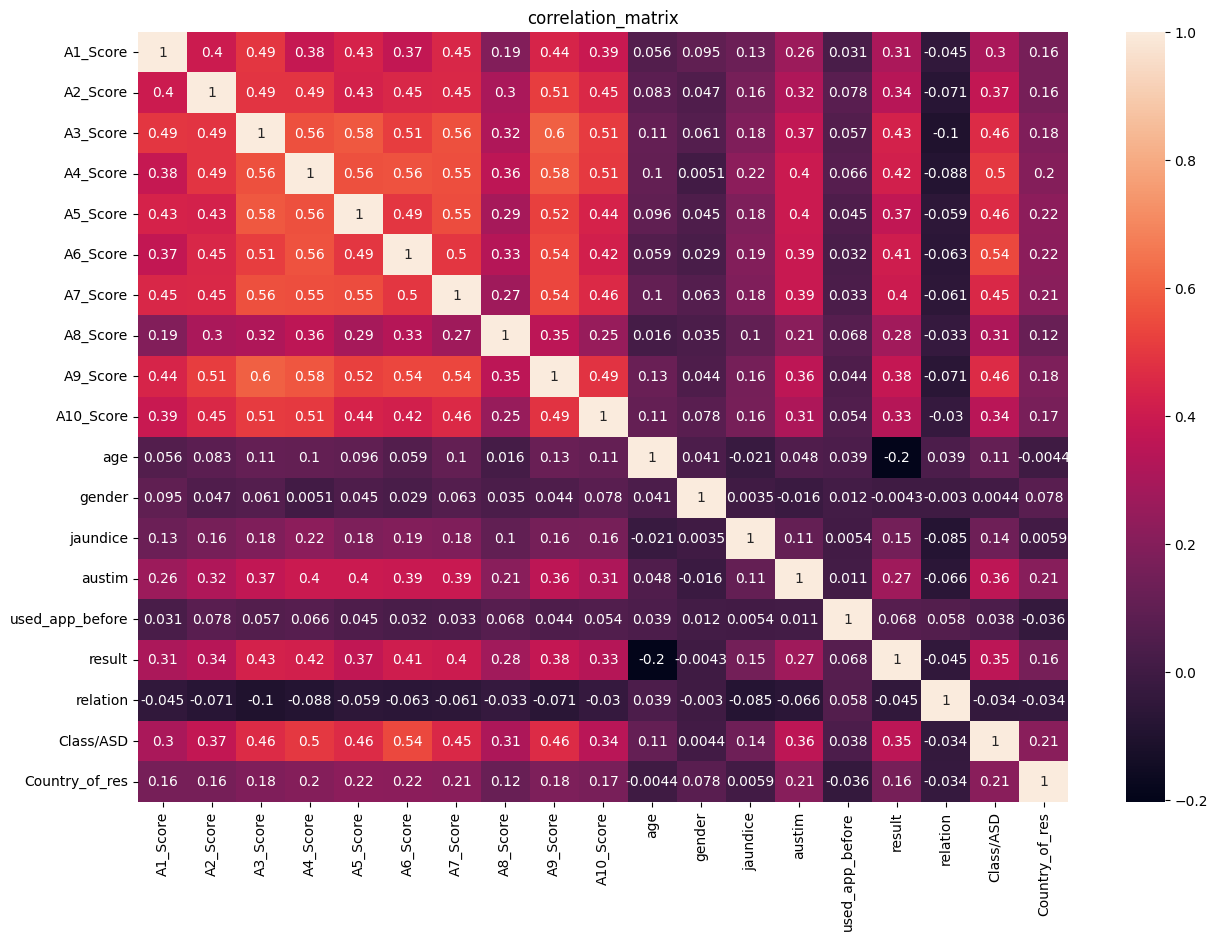

In [162]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation_matrix')

In [164]:
df.loc[df['age']>60, 'age'] = df['age'].median()

#Model_Building

In [165]:
X=df.drop(columns=['austim','Class/ASD'])
y=df['austim']


In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

###fixing data imbalance


In [167]:
X_train_smote,y_train_smote=SMOTE().fit_resample(X_train,y_train)

In [168]:
y_train_smote.value_counts()

,count
austim,
1,541
0,541


##Training

In [173]:
models={
    'LogisticRegression':LogisticRegression(max_iter=500),
    'RandomForestClassifier':RandomForestClassifier(random_state=42),
    'XGBClassifier':XGBClassifier()

}

In [174]:
for model_name,model in models.items():
  cv=cross_val_score(model,cv=5,scoring='accuracy',X=X_train_smote,y=y_train_smote)
  print(f'{model_name} accuracy: {cv.mean()}')
  model.fit(X_train_smote,y_train_smote)
  y_pred=model.predict(X_test)
  print(f'{model_name} accuracy: {accuracy_score(y_test,y_pred)}')
  print(confusion_matrix(y_test,y_pred))

LogisticRegression accuracy: 0.7708269329237071
LogisticRegression accuracy: 0.8
[[102  26]
 [  6  26]]
RandomForestClassifier accuracy: 0.8715480457415941
RandomForestClassifier accuracy: 0.81875
[[113  15]
 [ 14  18]]
XGBClassifier accuracy: 0.8789554531490016
XGBClassifier accuracy: 0.8125
[[109  19]
 [ 11  21]]


so random forest classifier is again a good model here

In [176]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.1 MB/s eta 0:00:00


In [177]:
import optuna

In [187]:
def objective(trial):
  params={
      'n_estimators':trial.suggest_int('n_estimators',100,1000,step=10),
      'max_depth':trial.suggest_int('max_depth',1,10,step=1),
      'min_samples_split':trial.suggest_int('min_samples_split',2,10,step=2),
      'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,10),
      'max_features':trial.suggest_categorical('max_features',['sqrt','log2',None])

  }
  model=RandomForestClassifier(**params,random_state=42,n_jobs=-1)
  model.fit(X_train_smote,y_train_smote)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  return accuracy


In [188]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=10)

[I 2025-09-29 09:31:37,157] A new study created in memory with name: no-name-079c09dc-4f3d-4ef9-b86f-1605736ac826
[I 2025-09-29 09:31:37,883] Trial 0 finished with value: 0.7625 and parameters: {'n_estimators': 290, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.7625.
[I 2025-09-29 09:31:40,264] Trial 1 finished with value: 0.7875 and parameters: {'n_estimators': 740, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7875.
[I 2025-09-29 09:31:42,520] Trial 2 finished with value: 0.7375 and parameters: {'n_estimators': 690, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 1 with value: 0.7875.
[I 2025-09-29 09:31:44,823] Trial 3 finished with value: 0.75 and parameters: {'n_estimators': 660, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 1 with val

In [189]:
best_params = study.best_trial.params
final_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, n_estimators=610,
                       n_jobs=-1, random_state=42)

In [190]:
y_pred=final_model.predict(X_test)

In [191]:
print('accuracy_score')
print(accuracy_score(y_test,y_pred))
print('confusion_matrixx')
print(confusion_matrix(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))

accuracy_score
0.81875
confusion_matrixx
[[124   4]
 [ 25   7]]
classification_report
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       128
           1       0.64      0.22      0.33        32

    accuracy                           0.82       160
   macro avg       0.73      0.59      0.61       160
weighted avg       0.79      0.82      0.78       160



In [192]:
import pickle

In [193]:
with open('austism_predictor_optuna.pkl','wb') as f :
  pickle.dump(final_model,f)